In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

%matplotlib inline

In [2]:
pwd

'C:\\Users\\Charne\\Documents\\greenhouse_rentals\\src'

In [3]:
df_bikes = pd.read_csv('C:\\Users\\Charne\\Documents\\greenhouse_rentals\\static\\SeoulBikeData.csv', encoding= 'unicode_escape')

In [4]:
df_bikes.shape

(8760, 14)

In [5]:
df_bikes.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
# Create table with variables and their total number of missing entries
total = df_bikes.isnull().sum().sort_values(ascending=False)
percent = (df_bikes.isnull().sum()/df_bikes.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Functioning Day,0,0.0
Holiday,0,0.0
Seasons,0,0.0
Snowfall (cm),0,0.0
Rainfall(mm),0,0.0
Solar Radiation (MJ/m2),0,0.0
Dew point temperature(°C),0,0.0
Visibility (10m),0,0.0
Wind speed (m/s),0,0.0
Humidity(%),0,0.0


In [7]:
# No missing values, no imputation needed

In [8]:
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [9]:
# Convert date col to datetime
df_bikes['Date'] = pd.to_datetime(df_bikes['Date'])

In [10]:
df_bikes['Date'].min()

Timestamp('2017-01-12 00:00:00')

In [11]:
# New cols for day month year and dow
df_bikes['Year'] = pd.DatetimeIndex(df_bikes.Date).year
df_bikes['Month'] = pd.DatetimeIndex(df_bikes.Date).month
df_bikes['Day'] = pd.DatetimeIndex(df_bikes.Date).day
df_bikes['DOW'] = pd.DatetimeIndex(df_bikes.Date).dayofweek

In [12]:
# New col for weekends
df_bikes['isWeekend'] = np.where((df_bikes['DOW'] == 5) | (df_bikes['DOW']==6), 1, 0)

In [13]:
# New binary holiday col
df_bikes['isHoliday'] = np.where(df_bikes['Holiday'] == 'Holiday', 1, 0)
df_bikes.drop(['Holiday'], axis=1, inplace=True)

In [14]:
# New binary functioning day col
df_bikes['isFunctioningDay'] = np.where(df_bikes['Functioning Day'] == 'Yes', 1, 0)
df_bikes.drop(['Functioning Day'], axis=1, inplace=True)

In [15]:
# Plot number of bike rentals per month

In [16]:
df_bikes.Year.value_counts()

2018    8016
2017     744
Name: Year, dtype: int64

In [17]:
df_bikes.groupby(['Year', 'Month'])['Rented Bike Count'].sum()

Year  Month
2017  1          9539
      2          8523
      3          7222
      4          8729
      5          8307
      6          6669
      7          8549
      8          8032
      9          7233
      10         3453
      11         5848
      12       103226
2018  1        277705
      2        255589
      3        447815
      4        547490
      5        657641
      6        700059
      7        682790
      8        606158
      9        492093
      10       623535
      11       487564
      12       208545
Name: Rented Bike Count, dtype: int64

<AxesSubplot:xlabel='Month'>

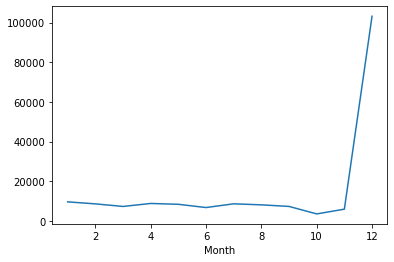

In [18]:
df_bikes[df_bikes.Year==2017].groupby('Month')['Rented Bike Count'].sum().plot()

<AxesSubplot:xlabel='Month'>

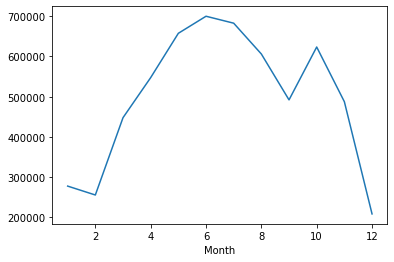

In [19]:
df_bikes[df_bikes.Year==2018].groupby('Month')['Rented Bike Count'].sum().plot()

<AxesSubplot:xlabel='Month'>

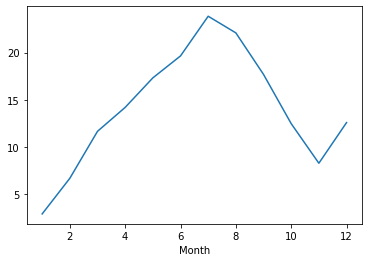

In [20]:
#Mean temp
df_bikes[df_bikes.Year==2018].groupby('Month')['Temperature(°C)'].mean().plot()

In [21]:
# Dependent Variable
df_bikes['Rented Bike Count'].describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented Bike Count, dtype: float64

Text(0.5, 1.0, 'Bike rental frequency distribution')

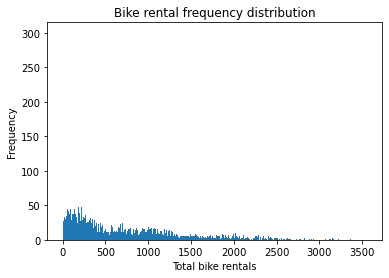

In [22]:
# Bike rental Histogram
plt.hist(df_bikes['Rented Bike Count'], bins=1000)
plt.ylabel('Frequency')
plt.xlabel('Total bike rentals')
plt.title('Bike rental frequency distribution')

In [23]:
# Slightly skewed, will need to log transform later

In [24]:
# Count current categorical vs numeric variables
numerical_feats = df_bikes.dtypes[df_bikes.dtypes!="object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = df_bikes.dtypes[df_bikes.dtypes=="object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  18
Number of Categorical features:  1


Text(0.5, 1.0, 'Multivariate Correlation Matrix')

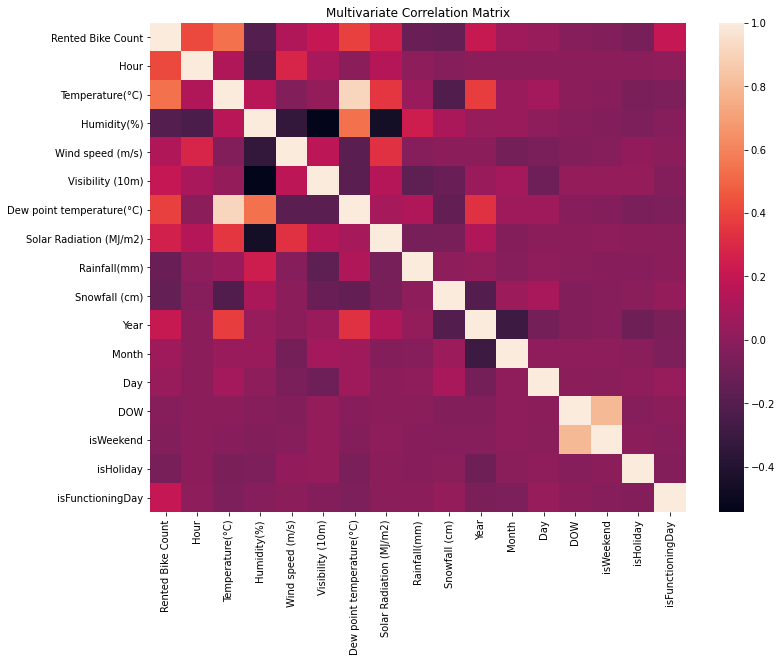

In [25]:
# Multivariate Correlation Matrix (Heatmap)
corrmat = df_bikes.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat)
plt.title('Multivariate Correlation Matrix')

In [26]:
# Find 10 most important features relative to target
corrmat.sort_values(['Rented Bike Count'], ascending = False, inplace = True)
print(corrmat['Rented Bike Count'].head(11))

Rented Bike Count            1.000000
Temperature(°C)              0.538558
Hour                         0.410257
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Year                         0.215162
isFunctioningDay             0.203943
Visibility (10m)             0.199280
Wind speed (m/s)             0.121108
Month                        0.070861
Day                          0.046849
Name: Rented Bike Count, dtype: float64


In [27]:
print(corrmat['Rented Bike Count'].tail(5))

isWeekend       -0.032259
isHoliday       -0.072338
Rainfall(mm)    -0.123074
Snowfall (cm)   -0.141804
Humidity(%)     -0.199780
Name: Rented Bike Count, dtype: float64


In [28]:
# Seems like our most predictive variables are temp, hour of day and humidity

In [38]:
df_plot = df_bikes[['Temperature(°C)', 'Hour', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Visibility (10m)',
           'Wind speed (m/s)', 'Rainfall(mm)', 'Snowfall (cm)', 'Humidity(%)', 'Rented Bike Count']].copy()

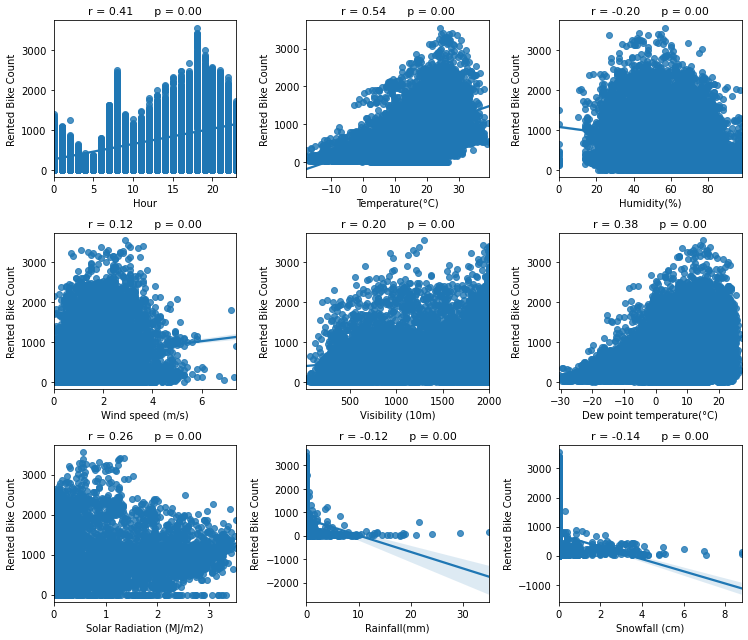

In [39]:
nr_rows = 3
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

li_num_feats = list(numerical_feats)
li_plot = ['Temperature(°C)', 'Hour', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Visibility (10m)',
           'Wind speed (m/s)', 'Rainfall(mm)', 'Snowfall (cm)', 'Humidity(%)']
li_plot_num_feats = [c for c in list(numerical_feats) if c in li_plot]


for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(df_plot[li_plot_num_feats[i]], df_plot['Rented Bike Count'], ax = axs[r][c])
            stp = stats.pearsonr(df_plot[li_plot_num_feats[i]], df_plot['Rented Bike Count'])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show()

Skewness: 1.1534281773679014


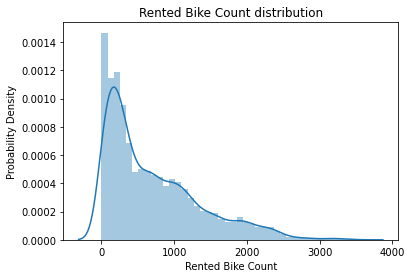

In [31]:
# Plot
sns.distplot(df_bikes['Rented Bike Count'])
plt.ylabel('Probability Density')
plt.xlabel('Rented Bike Count')
plt.title('Rented Bike Count distribution')
# Skewness
print("Skewness: {}".format(df_bikes['Rented Bike Count'].skew()))

In [32]:
df_bikes[df_bikes['Rented Bike Count']== 0].shape

(295, 19)

Using the standard np.log function was not a viable option, as our data contained zeroes. Using log where values are 0 or close to 0 can distort data towards large negative numbers, such as −∞. Instead, we used np.log1p, which is log(1+x). This ensures that the transformation only produces positive values with a more homogeneous distribution.

In [33]:
# Log(1+x) transformation
df_bikes['RentedBikes_Log'] = np.log1p(df_bikes['Rented Bike Count'])

Skewness: -1.8321986426412804


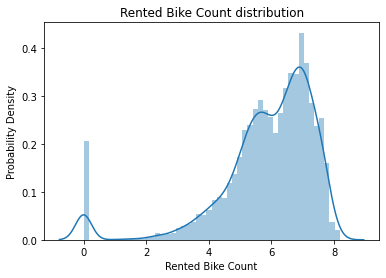

In [34]:
# Plot
sns.distplot(df_bikes['RentedBikes_Log'])
plt.ylabel('Probability Density')
plt.xlabel('Rented Bike Count')
plt.title('Rented Bike Count distribution')
# Skewness
print('Skewness: {}'.format(df_bikes['RentedBikes_Log'].skew()))

In [35]:
df_bikes.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Year,Month,Day,DOW,isWeekend,isHoliday,isFunctioningDay,RentedBikes_Log
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,2017,1,12,3,0,0,1,5.541264
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,2017,1,12,3,0,0,1,5.323010
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,2017,1,12,3,0,0,1,5.159055
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,2017,1,12,3,0,0,1,4.682131
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,2017,1,12,3,0,0,1,4.369448


In [36]:
# df_bikes.to_csv('C:\\Users\\Charne\\Documents\\greenhouse_rentals\\static\\SeoulBikeData_cleaned.csv', encoding= 'unicode_escape', index=False)